In [ ]:
!pip install tf-nightly

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from IPython.display import Image

In [ ]:
import pathlib
path = "/content/drive/MyDrive/DR/Train"
data_dir = pathlib.Path(path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


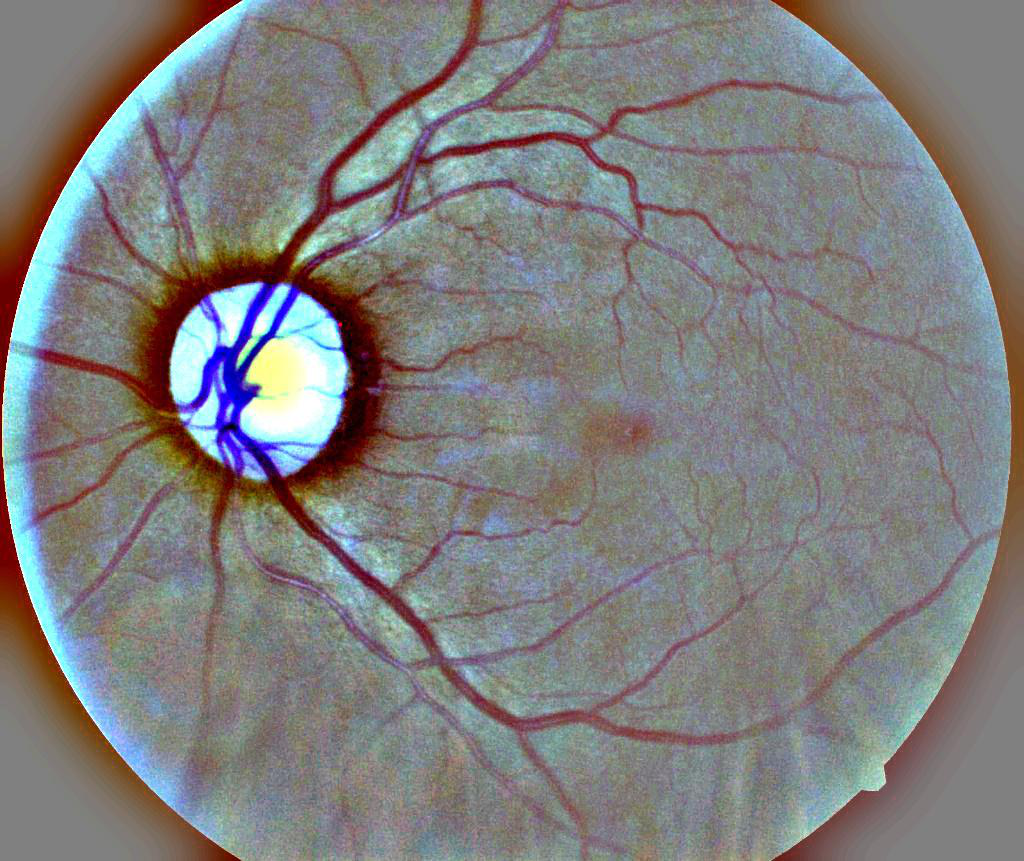

In [ ]:
Mild  = list(data_dir.glob('Mild DR/*'))
PIL.Image.open(str(Mild [1]))

In [ ]:
batch_size = 32
img_height = 150
img_width = 150

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 11554 files belonging to 4 classes.
Using 9244 files for training.
Found 11554 files belonging to 4 classes.
Using 2310 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Mild DR', 'Moderate DR', 'Not DR', 'Severe DR']


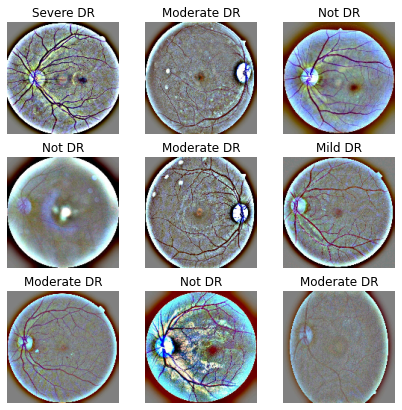

In [ ]:
plt.figure(figsize=(7, 7)) 
for images, labels in train_ds.take(1):
 for i in range(9): 
   ax = plt.subplot(3, 3, i + 1)
   plt.imshow(images[i].numpy().astype("uint8"))
   plt.title(class_names[labels[i]])
   plt.axis("off")

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
num_classes =9  
model = Sequential([
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)])

In [ ]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 37, 37, 64)       

In [ ]:
epochs=10  
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
289/289 [==============================] - 261s 880ms/step - loss: 0.6037 - accuracy: 0.7196 - val_loss: 0.4612 - val_accuracy: 0.7844
Epoch 2/10
289/289 [==============================] - 248s 854ms/step - loss: 0.4329 - accuracy: 0.7871 - val_loss: 0.4423 - val_accuracy: 0.7455
Epoch 3/10
289/289 [==============================] - 254s 873ms/step - loss: 0.3983 - accuracy: 0.8034 - val_loss: 0.4122 - val_accuracy: 0.7831
Epoch 4/10
289/289 [==============================] - 249s 856ms/step - loss: 0.3828 - accuracy: 0.8098 - val_loss: 0.4345 - val_accuracy: 0.7576
Epoch 5/10
289/289 [==============================] - 254s 876ms/step - loss: 0.3479 - accuracy: 0.8273 - val_loss: 0.4653 - val_accuracy: 0.7472
Epoch 6/10
289/289 [==============================] - 251s 865ms/step - loss: 0.3209 - accuracy: 0.8464 - val_loss: 0.4951 - val_accuracy: 0.7896
Epoch 7/10
289/289 [==============================] - 250s 860ms/step - loss: 0.2857 - accuracy: 0.8677 - val_loss: 0.4935 -

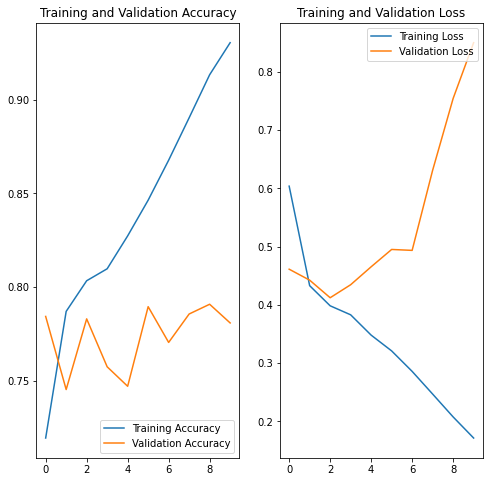

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 48ms/step


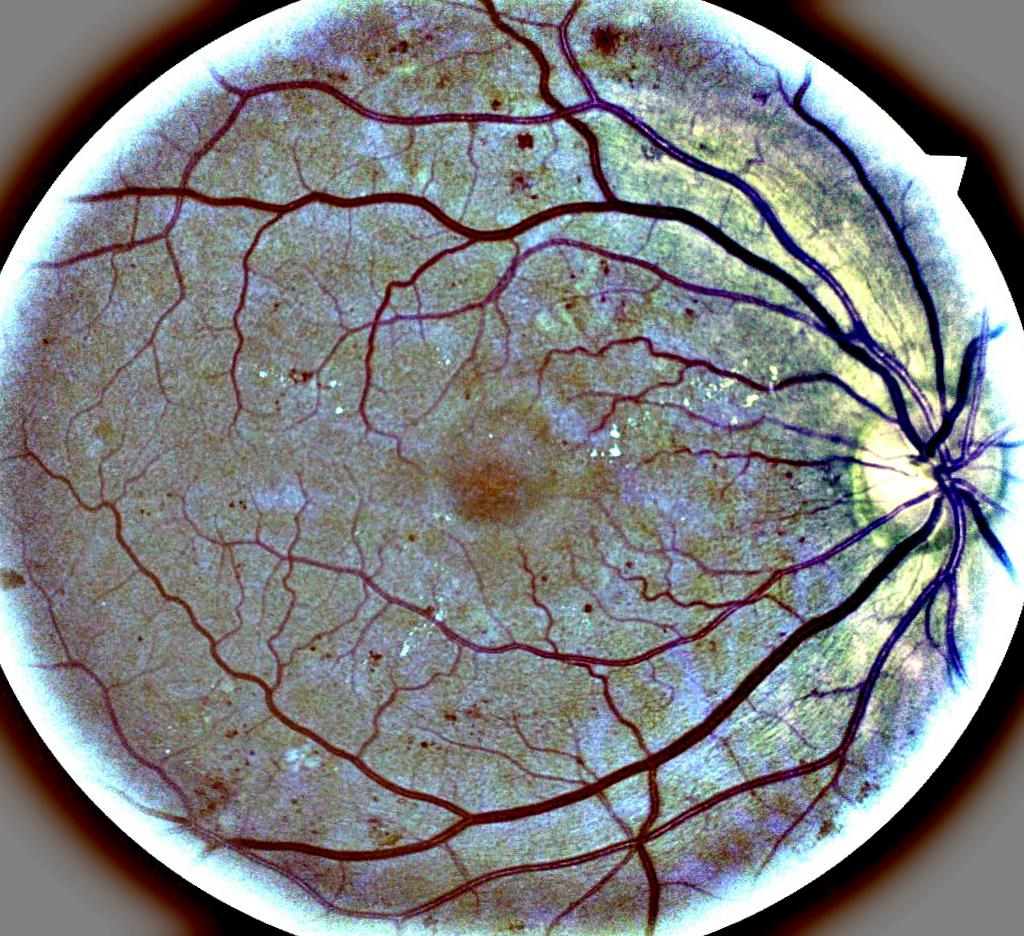

จากการประมวลผลภาพจอประสาทตาภาพนี้ เป็น โรคเบาหวานขึ้นจอตาระยะ  Severe DR มีความตรงกันกับต้นแบบ 100.00 % 


In [ ]:
path = "/content/drive/MyDrive/DR/Test/Severe DR/Severe DR10606_right_0_8566.jpeg"
img = keras.preprocessing.image.load_img(
path, target_size=(img_height, img_width)
)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print(
"จากการประมวลผลภาพจอประสาทตาภาพนี้ เป็น โรคเบาหวานขึ้นจอตาระยะ  {} มีความตรงกันกับต้นแบบ {:.2f} % "
.format(class_names[np.argmax(score)], 100 * np.max(score))
)